# Sales Analysis
Sales Analysis based on the data of electronics store purchases during 2019.  

|   | Order ID | Product               | Quantity Ordered | Price Each | Order Date     | Purchase Address                       |
|---|----------|-----------------------|------------------|------------|----------------|----------------------------------------|
| 0 | 295665   | Macbook Pro Laptop    | 1                | 1700       | 12/30/19 00:01 | 136 Church St, New York City, NY 10001 |
| 1 | 295666   | LG Washing Machine    | 1                | 600\.0     | 12/29/19 07:03 | 562 2nd St, New York City, NY 10001    |

----------------------------------------------------------------------------------------------------------------------------------

- Load data
- Data engineering
    - data integration
    - drop missing/incomplete data
    - change data type
- visualization
    - monthly sales in quantities and dollars($)
    - donut chart based on customers' States
    - product popularity
    - time of the purchases analysis
    - items that frequently bought together



In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import plotly.express as px
import seaborn as sns

In [2]:
#Combine Data
path = os.getcwd() 
files = [files for files in os.listdir(path+'/sale_data') if files.endswith(".csv")]
all_months_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv('sale_data/' + file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("sale_data/all_sales.csv", index=False)

In [3]:
all_data = pd.read_csv("all_sales.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
#Remove Missing Data
print(all_data.isna().sum())
print("-"*80)
nan = all_data[all_data.isna().any(axis=1)]
display(nan.head())
all_data = all_data.dropna()


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
--------------------------------------------------------------------------------


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Data info
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
#Datatype
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
#Data manipulation
all_data['Y/M'] = all_data['Order Date'].dt.strftime('%Y-%m')
all_data['City']= all_data['Purchase Address'].str.split(",",expand = True)[1]
all_data['State']= all_data['Purchase Address'].str.split(",",expand = True)[2].str.split(" ",expand = True)[1]
all_data = all_data[all_data['Order Date'] < "2020-01-01"]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Y/M,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12,New York City,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12,New York City,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12,Atlanta,GA


In [7]:
#Pickled object to file
all_data.to_pickle("./dummy.pkl")
df = pd.read_pickle("./dummy.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Y/M               185916 non-null  object        
 7   City              185916 non-null  object        
 8   State             185916 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 14.2+ MB


# Visualization
- Q1) How many items do we sell each month?
- Q2) Which State has the most active buying attributes?
- Q3) What product is the most popular?
- Q4) Which products are the two least popular in each city?
- Q5) What time should we display advertisements to maximize likelihood of customer's buying product? 
- Q6) What products are most often sold together?  

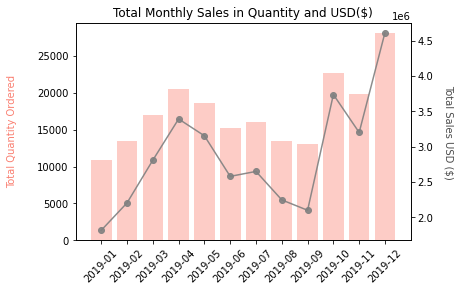

In [315]:
# Q1 How many items do we sell each month?
monthly = df.groupby('Y/M',as_index=False).agg(Monthly_Sales = ("Quantity Ordered",sum))
df['Sales_USD'] = df['Quantity Ordered']* df['Price Each']
monthly_usd = df.groupby('Y/M',as_index=False).agg(Total_Sales_USD = ("Sales_USD",sum))

fig,ax = plt.subplots()
plt.title('Total Monthly Sales in Quantity and USD($)')
ax.bar(monthly['Y/M'],monthly.Monthly_Sales, color="salmon",alpha=0.4)
ax2=ax.twinx() # ax2 handles y
ax2.plot(monthly_usd['Y/M'], monthly_usd["Total_Sales_USD"],color="grey",marker="o",alpha=0.9)

ax.set_ylabel('Total Quantity Ordered', color="salmon",labelpad=20)
ax2.set_ylabel('Total Sales USD ($)',color="black",alpha=0.7,rotation=-90,labelpad=20)
ax.tick_params(axis="x",labelrotation=45)
plt.show()

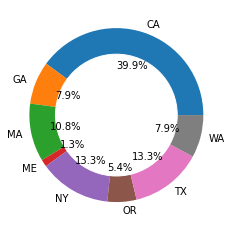

In [316]:
# Q2 Which State has the most active buying attributes?
grouped_df = df.groupby(['State']).agg(Total_Sales_Percent = ("Quantity Ordered",sum))
percent_df = grouped_df.apply(lambda x:round(100 * x/float(x.sum()),2)).reset_index()
plt.pie(percent_df['Total_Sales_Percent'], labels=percent_df['State'],autopct='%1.1f%%')
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.show()

<AxesSubplot:xlabel='Product'>

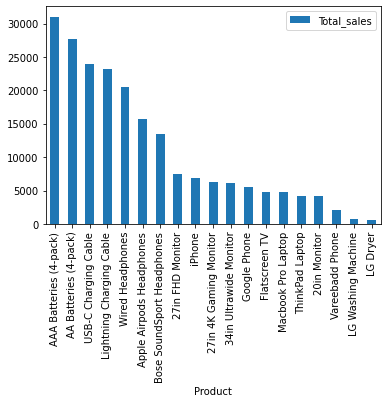

In [61]:
# Q3 What product is the most popular?
df_product = df.groupby(['Product'],as_index=False).agg(Total_sales = ("Quantity Ordered",sum))
df_product.sort_values(['Total_sales'], ascending=False).plot(kind="bar",x="Product")

In [229]:
# Q4 Which products are the two least popular in each city?
city_prod = df.groupby(['City','Product'],as_index=False)['Quantity Ordered'].sum()
city_prod.sort_values(['City','Quantity Ordered'],ascending=False).groupby(['City'],as_index=False).tail(2)
#last()
#nth(7) 
#head(3)
#first()

,City,Product,Quantity Ordered
163,Seattle,LG Washing Machine,58
162,Seattle,LG Dryer,56
144,San Francisco,LG Washing Machine,180
143,San Francisco,LG Dryer,143
124,Portland,LG Dryer,37
125,Portland,LG Washing Machine,37
106,New York City,LG Washing Machine,85
105,New York City,LG Dryer,77
86,Los Angeles,LG Dryer,116
87,Los Angeles,LG Washing Machine,105


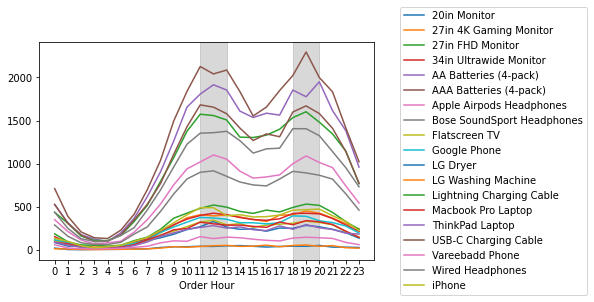

In [118]:
# Q5 What time should we display advertisements to maximize likelihood of customer's buying product? 
hourly = pd.pivot_table(df, index = df['Order Date'].dt.hour, columns = 'Product', values = 'Quantity Ordered', aggfunc = 'sum')
hour = hourly.plot(kind='line')
hour.legend(loc='center right', bbox_to_anchor=(1.65, 0.5), ncol=1)
plt.xticks(np.arange(0,24, 1))
plt.xlabel("Order Hour")
hour.axvspan(11,13, alpha=0.3, color='grey')
hour.axvspan(18,20, alpha=0.3, color='grey')
plt.show()

In [206]:
# Q6 What products are most often sold together?
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
0,295665,Macbook Pro Laptop
1,295666,LG Washing Machine
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable


In [226]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
